In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [4]:
# pip install mglearn

In [5]:

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [7]:
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [8]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

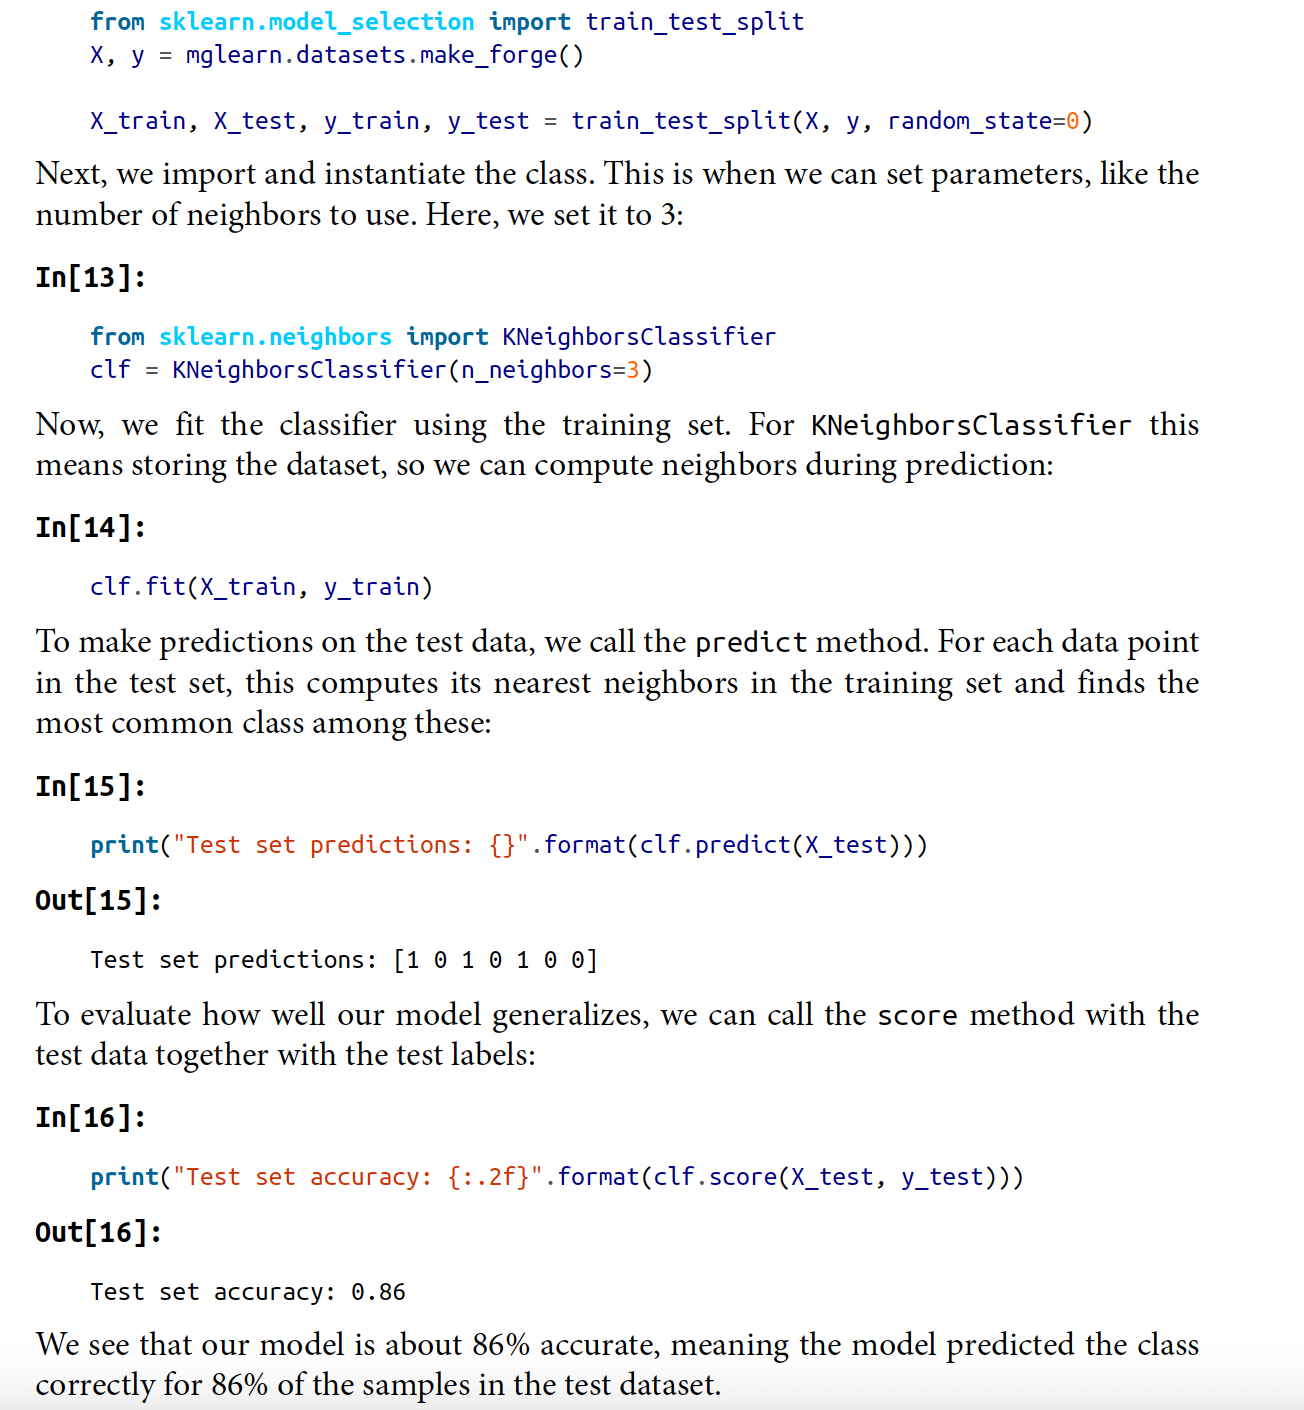

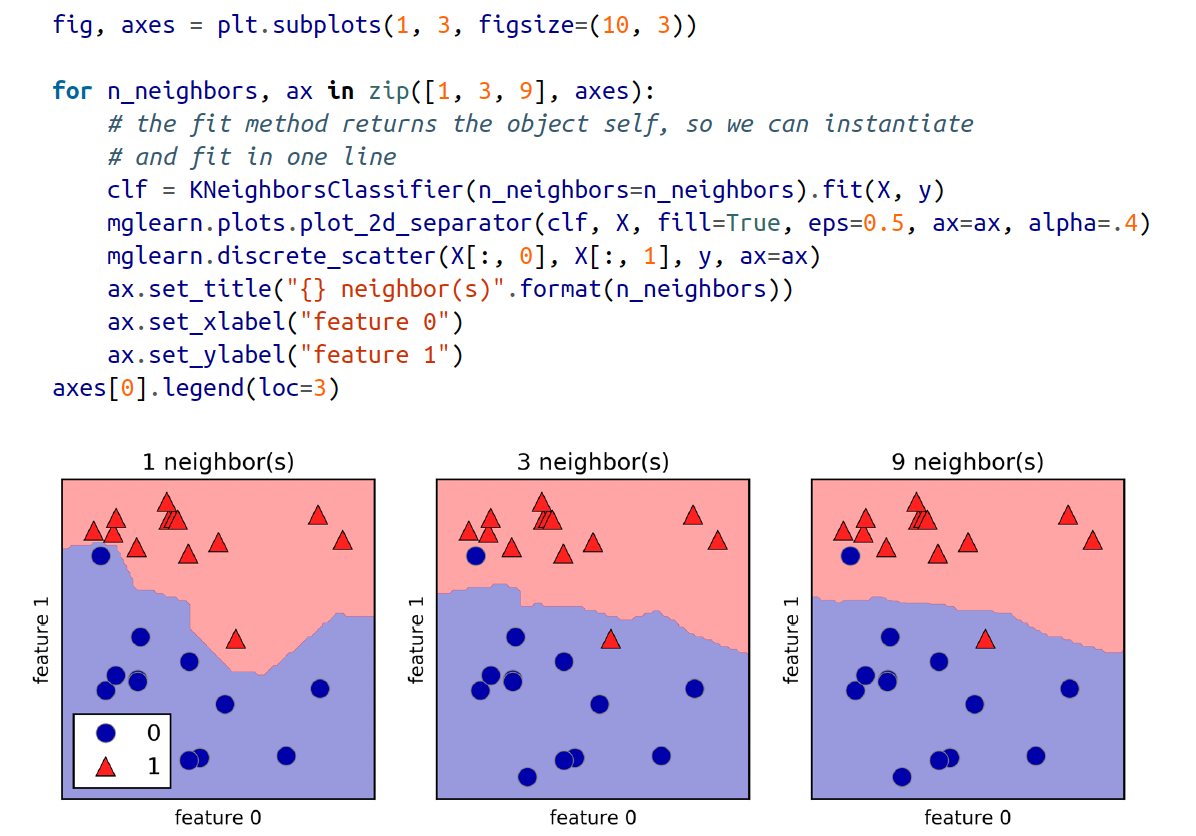

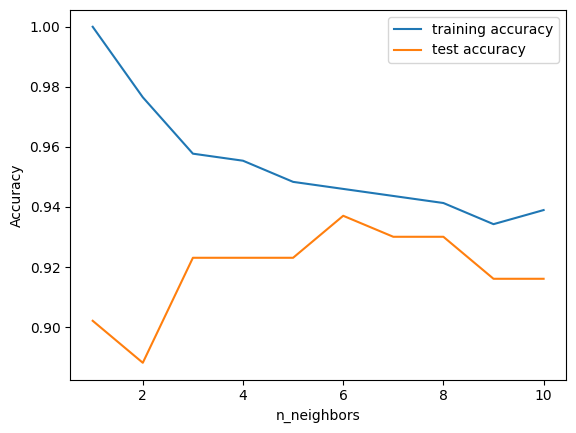

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 6.61979655e-02  2.90231325e-04  1.22104348e-02 -8.47821631e-04
  4.82193696e-01  2.50515225e+00 -1.71646173e+00 -1.59150719e+00
 -2.08456831e-01  3.65691611e+00 -6.69572719e-01  2.50682659e-02
  1.14387141e-01 -5.51974915e-04 -2.73284156e+01  5.60746746e-01
  2.44352766e+00 -6.69241274e+00 -5.28167829e+00  1.95909109e+01
 -1.81211342e-01 -1.00146516e-02 -1.03668337e-02  1.40243516e-03
  4.93497684e-01 -3.51900757e-02 -1.83039588e-01 -9.65513149e-01
 -3.00770047e-02 -6.65033208e+00]
lr.intercept_: 2.757875672050689


In [11]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.67


In [12]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.75
Test set score: 0.70


Ridge is a more restricted model, so we are
less likely to overfit. A less complex model means worse performance on the training
set, but better generalization.
The particular kind used by ridge regression
is known as L2 regularization

The Ridge model makes a trade-off between the simplicity of the model (near-zero
coefficients) and its performance on the training set

The optimum setting of alpha depends on the particular dataset we are using.
Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization.

In [13]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.73
Test set score: 0.68


Decreasing alpha allows the coefficients to be less restricted
For very small values of alpha, coefficients are barely restricted at all,
and we end up with a model that resembles LinearRegression

In [14]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.71


In [15]:
# alpha=0.1 seems to be working well. We could try decreasing alpha even more
# to improve generalization.

In [16]:
# A higher alpha means a more restricted model, so we expect the entries of coef_ to
# have smaller magnitude for a high value of alpha than for a low value of alpha.

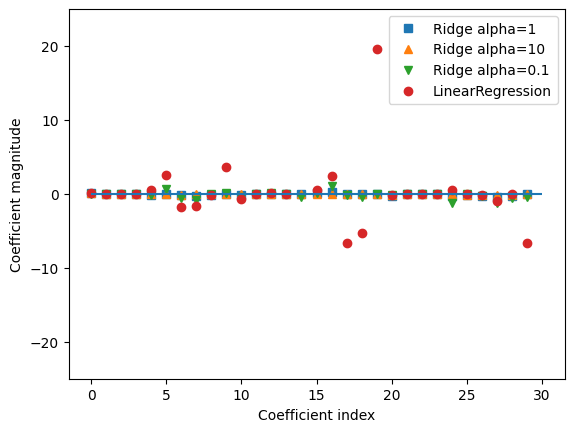

In [17]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [18]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print("Number of features: {}".format(np.shape(lasso.coef_)))


Training set score: 0.56
Test set score: 0.50
Number of features used: 2
Number of features: (30,)


An alternative to Ridge for regularizing linear regression is Lasso. As with ridge
regression, using the lasso also restricts coefficients to be close to zero, but in a
slightly different way, called L1 regularization

The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features
are entirely ignored by the model. This can be seen as a form of automatic feature selection

In [19]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso0001.coef_ != 0)))
print("Number of features: {}".format(np.shape(lasso.coef_)))

Training set score: 0.77
Test set score: 0.72
Number of features used: 22
Number of features: (30,)


In [20]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))
print("Number of features: {}".format(np.shape(lasso.coef_)))

Training set score: 0.75
Test set score: 0.69
Number of features used: 13
Number of features: (30,)


Text(0, 0.5, 'Coefficient magnitude')

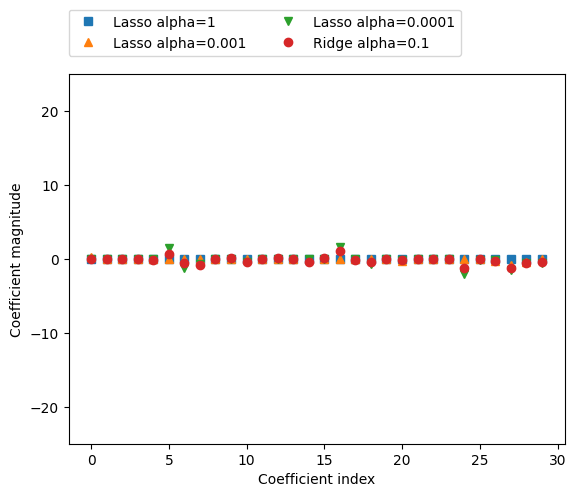

In [21]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.001")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Text(0, 0.5, 'Coefficient magnitude')

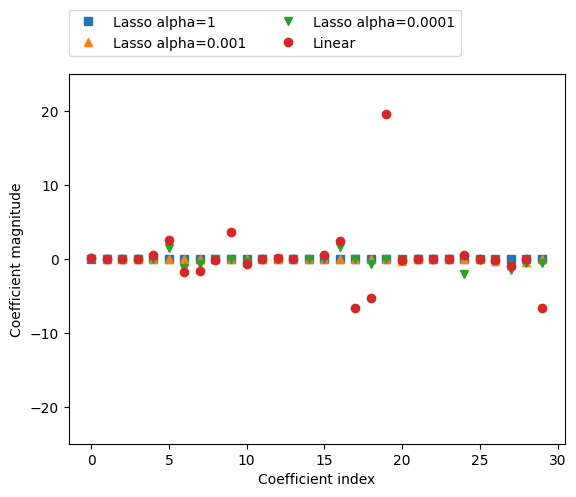

In [22]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.001")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(lr.coef_, 'o', label="Linear")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Training set score: 0.77
Test set score: 0.71
Training set score: 0.70
Test set score: 0.66


Text(0, 0.5, 'Coefficient magnitude')

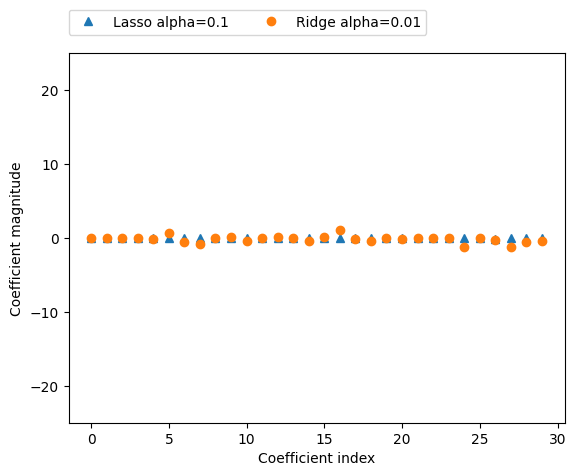

In [23]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))


plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.1")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.01")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

The Ridge model with alpha=0.1 has similar predictive performance as the lasso model with alpha=0.01, but using Ridge, all coefficients are nonzero.

In practice, ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice.

Similarly, if you would like to have a
model that is easy to interpret, Lasso will provide a model that is easier to understand,
as it will select only a subset of the input features

Scikit-learn also provides
the ElasticNet class, which combines the penalties of Lasso and Ridge. In practice,
this combination works best, though at the price of having two parameters to adjust:
one for the L1 regularization, and one for the L2 regularization

# Linear Classification

Linear models are also extensively used for classification. Let’s look at binary classification
first. In this case, a prediction is made using the following formula:
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0
The formula looks very similar to the one for linear regression, but instead of just
returning the weighted sum of the features, we threshold the predicted value at zero.
If the function is smaller than zero, we predict the class –1; if it is larger than zero, we
predict the class +1

The two most common linear classification algorithms are logistic regression, implemented
in linear_model.LogisticRegression, and linear support vector machines
(linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier).

In regression, if we set alpha too low, however, we again remove the effect of regularization and end
up overfitting, with a result similar to LinearRegression.

In Classification, trade-off parameter that determines the
strength of the regularization is called C, and higher values of C correspond to less regularization.  when you use a high value for the parameter C, Logis
ticRegression and LinearSVC try to fit the training set as best as possible, while with
low values of the parameter C, the models put more emphasis on finding a coefficient
vector (w) that is close to zero.

Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using
a higher value of C stresses the importance that each individual data point be classified correctly.

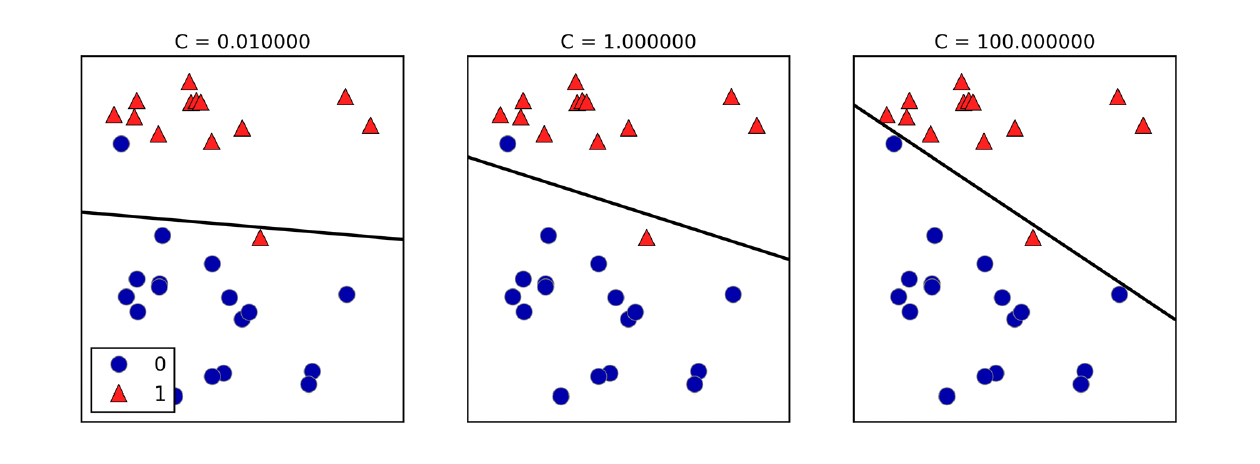

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression 
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.944
Test set score: 0.958


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


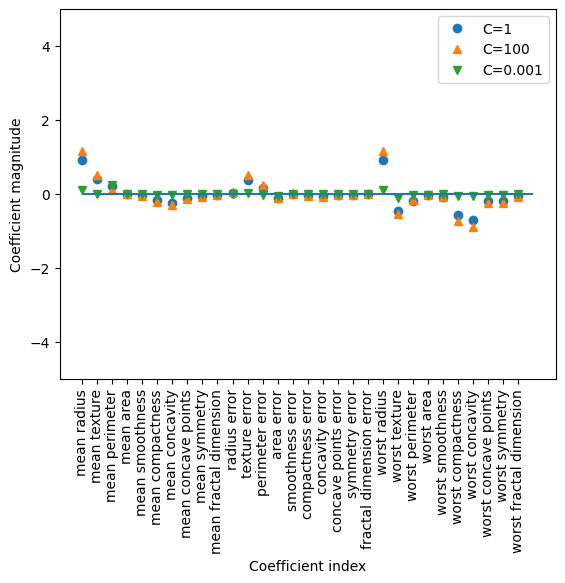

In [27]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

Training accuracy of l1 logreg with C=0.001: 0.95
Test accuracy of l1 logreg with C=0.001: 0.96
Training accuracy of l1 logreg with C=1.000: 0.95
Test accuracy of l1 logreg with C=1.000: 0.96


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: Conver

Training accuracy of l1 logreg with C=100.000: 0.95
Test accuracy of l1 logreg with C=100.000: 0.96


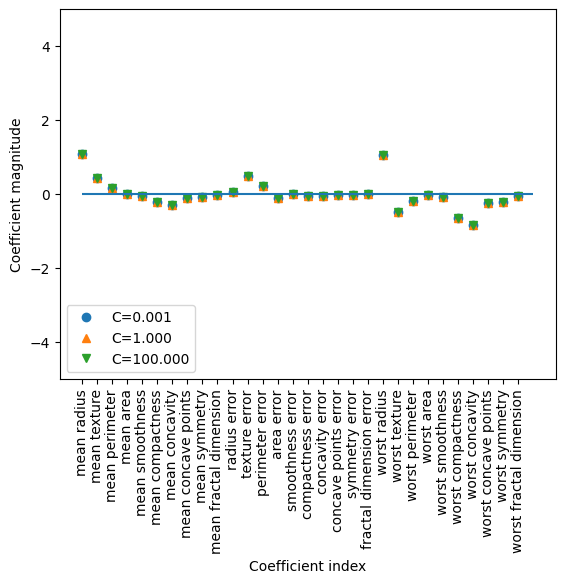

In [28]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
  lr_l1 = LogisticRegression(C=C, penalty='none').fit(X_train, y_train)
  print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
  C, lr_l1.score(X_train, y_train)))
  print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
  C, lr_l1.score(X_test, y_test)))
  plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

Many linear classification models are for binary classification only, and don’t extend
naturally to the multiclass case (with the exception of logistic regression). A common
technique to extend a binary classification algorithm to a multiclass classification
algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is
learned for each class that tries to separate that class from all of the other classes,
resulting in as many binary models as there are classes. To make a prediction, all
binary classifiers are run on a test point. The classifier that has the highest score on its
single class “wins,” and this class label is returned as the prediction.

The main parameter of linear models is the regularization parameter, called alpha in
the regression models and C in LinearSVC and LogisticRegression. Large values for
alpha or small values for C mean simple models. In particular for the regression models,
tuning these parameters is quite important.

millions of samples, you might want to investigate using the
solver='sag'
option in
and Ridge, which can be faster than the default on
LogisticRegression
large datasets.

###Naive Bayes

The price paid for this efficiency is that naive Bayes models often provide
generalization performance that is slightly worse than that of linear classifiers like LogisticRegression and LinearSVC.


The reason that naive Bayes models are so efficient is that they learn parameters by
looking at each feature individually and collect simple per-class statistics from each
feature.

GaussianNB can be applied to
any continuous data, while BernoulliNB assumes binary data and MultinomialNB
assumes count data (that is, that each feature represents an integer count of something,
like how often a word appears in a sentence). BernoulliNB and MultinomialNB
are mostly used in text data classification.
The BernoulliNB classifier counts how often every feature of each class is not zero.

MultinomialNB takes into account the average value of each feature for each class, while GaussianNB stores the average value
 as well as the standard deviation of each feature for each class.

To make a prediction, a data point is compared to the statistics for each of the classes,
and the best matching class is predicted. Interestingly, for both MultinomialNB and
BernoulliNB, this leads to a prediction formula that is of the same form as in the linear
models

A large alpha means more smoothing, resulting in less
complex models. The algorithm’s performance is relatively robust to the setting of
alpha, meaning that setting alpha is not critical for good performance. However,
tuning it usually improves accuracy somewhat

###Decision Trees

Decision trees are widely used models for classification and regression tasks. Essentially,
they learn a hierarchy of if/else questions, leading to a decision.

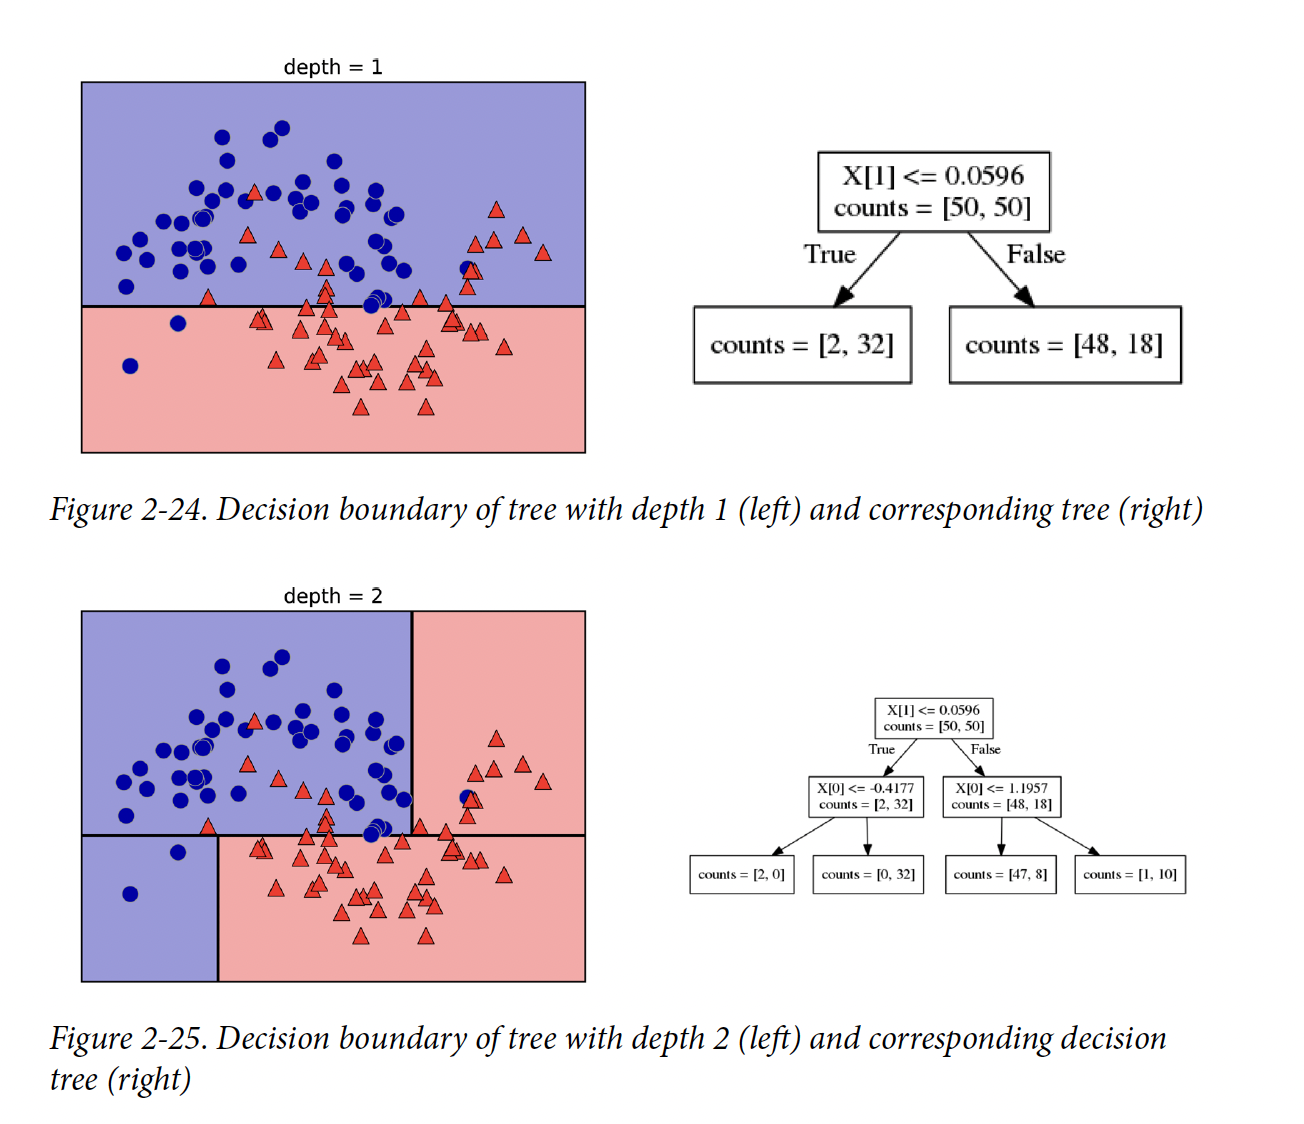

The recursive partitioning of the data is repeated until each region in the partition
(each leaf in the decision tree) only contains a single target value (a single class or a
single regression value)

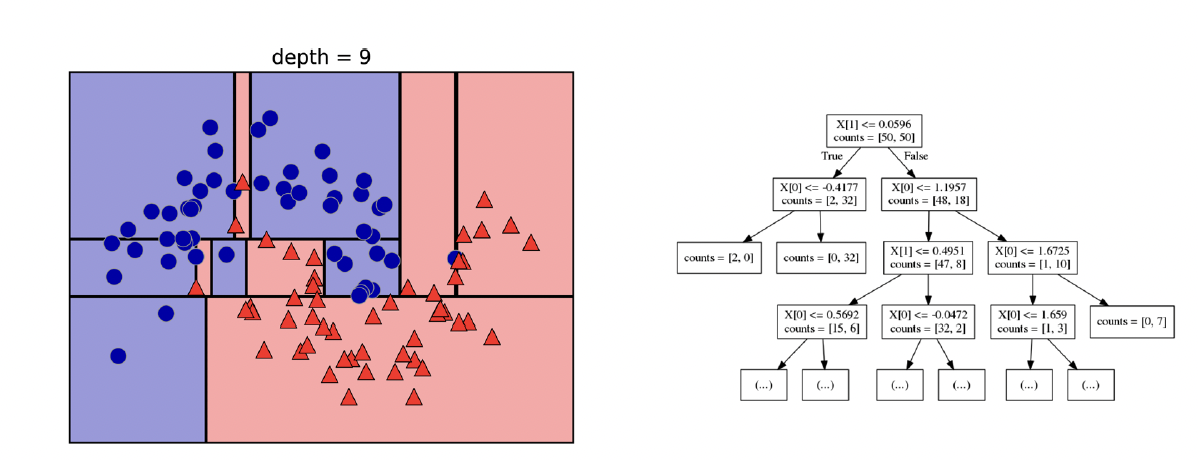

A prediction on a new data point is made by checking which region of the partition
of the feature space the point lies in, and then predicting the majority target (or the
single target in the case of pure leaves) in that region

A leaf of the tree that contains data points that all share the
same target value is called pure.The
presence of pure leaves mean that a tree is 100% accurate on the training set; each
data point in the training set is in a leaf that has the correct majority class.

There are two common strategies to prevent overfitting: stopping the creation of the
tree early (also called pre-pruning), or building the tree but then removing or collapsing
nodes that contain little information (also called post-pruning or just pruning). Possible criteria for pre-pruning include limiting the maximum depth of the tree,
limiting the maximum number of leaves, or requiring a minimum number of points
in a node to keep splitting it.

In [29]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


let’s apply pre-pruning to the tree, which will stop developing
the tree before we perfectly fit to the training data.

In [30]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [31]:
# We can visualize the tree using the export_graphviz function from the tree module.
# This writes a file in the .dot file format, which is a text file format for storing graphsfrom 

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

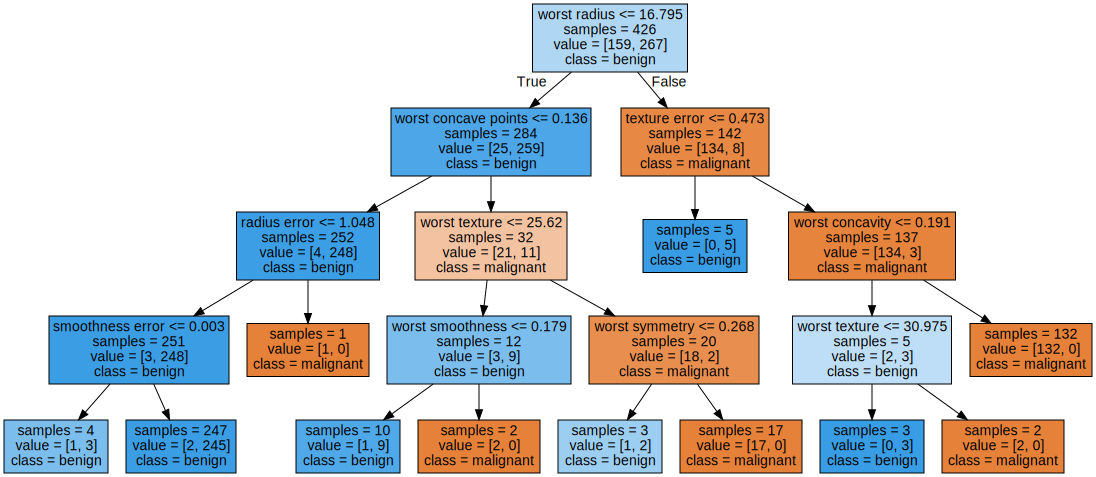

In [32]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Instead of looking at the whole tree, which can be taxing, there are some useful properties
that we can derive to summarize the workings of the tree. The most commonly
used summary is feature importance, which rates how important each feature is for
the decision a tree makes.

In [33]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


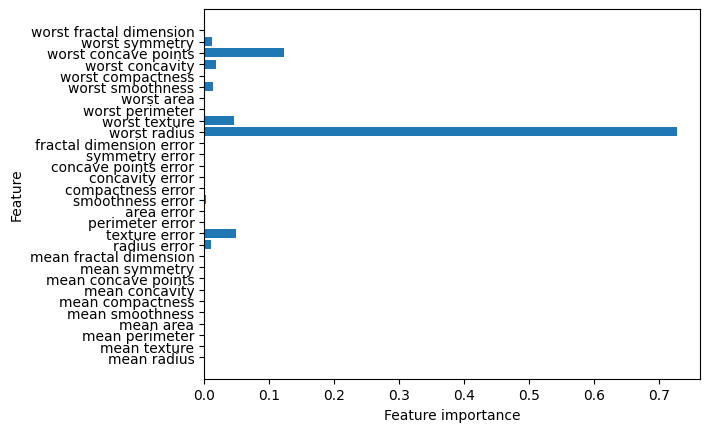

In [34]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

While we focused our discussion here on decision trees for classification, all that was
said is similarly true for decision trees for regression, as implemented in Decision
TreeRegressor

Text(0, 0.5, 'Price in $/Mbyte')

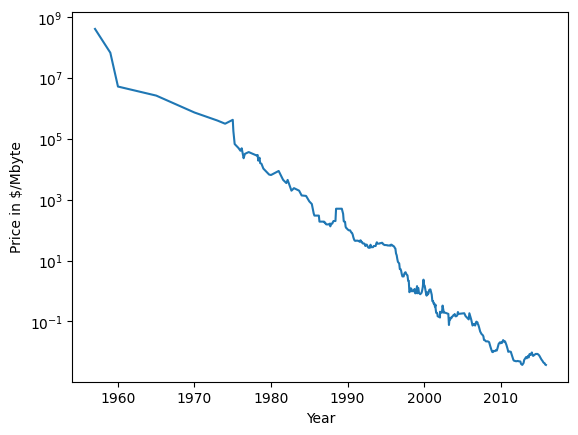

In [35]:
import pandas as pd
ram_prices = pd.read_csv("/content/drive/MyDrive/Applied Machine Learning/Machine Learning with Python/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [36]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

<ipython-input-36-4536aff91b3c>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-36-4536aff91b3c>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


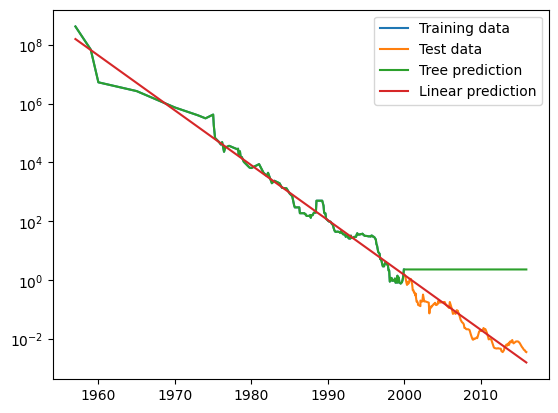

In [37]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

Decision trees have two advantages over many of the algorithms we’ve discussed so
far: the resulting model can easily be visualized and understood by nonexperts (at
least for smaller trees), and the algorithms are completely invariant to scaling of the
data.

###Ensembles of Decision Trees

The main drawback of decision trees is that they tend to overfit the
training data. Random forests are one way to address this problem. A random forest
is essentially a collection of decision trees, where each tree is slightly different from
the others.

If we build many
trees, all of which work well and overfit in different ways, we can reduce the amount
of overfitting by averaging their results.

There are two ways in which the trees in a random
forest are randomized: by selecting the data points used to build a tree and by selecting
the features in each split test.

To build a tree,
we first take what is called a bootstrap sample of our data. That is, from our
n_samples
data points, we repeatedly draw an example randomly with replacement (meaning the
same sample can be picked multiple times),
times. This will create a data
n_samples
set
that is as big as the original dataset, but some data points will be missing from it
(approximately one third), and some will be repeated.

bootstrap sample of the list ['a', 'b',
'c', 'd']. A possible bootstrap sample would be ['b', 'd', 'd', 'c']. Another
possible sample would be ['d', 'a', 'd', 'a'].

A high max_fea
tures means that the trees in the random forest will be quite similar, and they will be
able to fit the data easily, using the most distinctive features. A low max_features
means that the trees in the random forest will be quite different, and that each tree
might need to be very deep in order to fit the data well.

To make a prediction using the random forest, the algorithm first makes a prediction
for every tree in the forest. For regression, we can average these results to get our final
prediction. For classification, a “soft voting” strategy is used. This means each algorithm
makes a “soft” prediction. The probabilities predicted by all the trees are averaged, and the class with the
highest probability is predicted.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

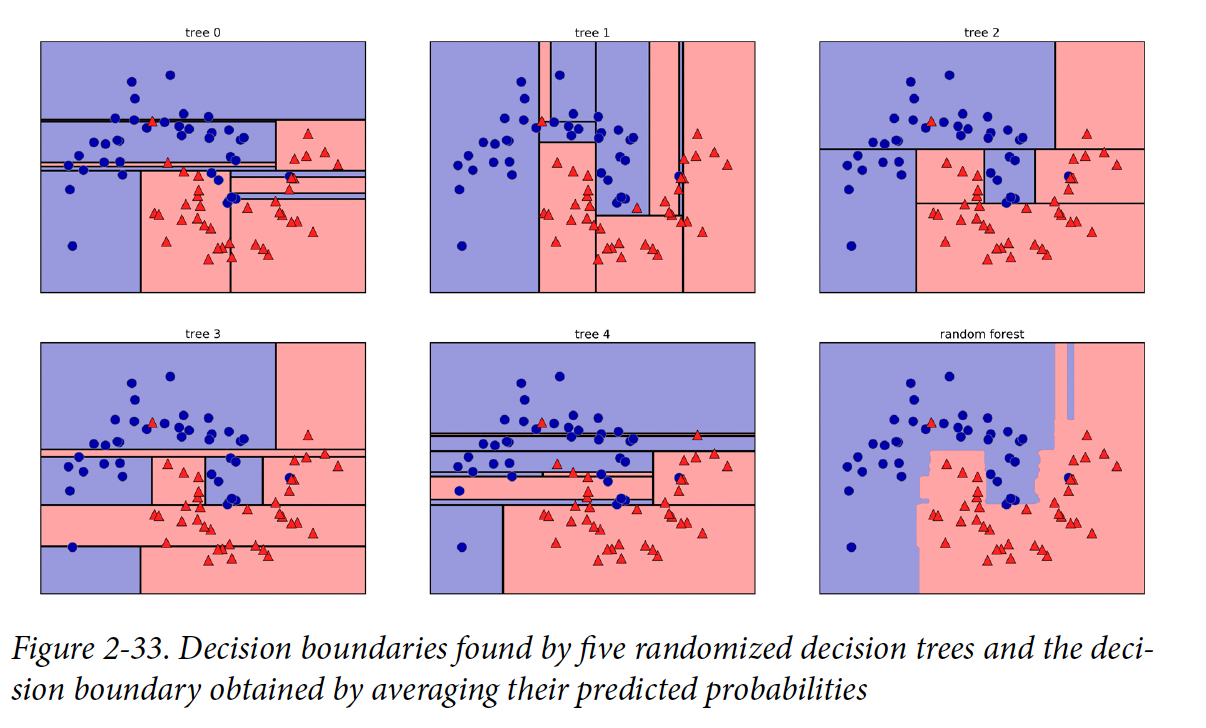

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


Typically,
the feature importances provided by the random forest are more reliable than
the ones provided by a single tree

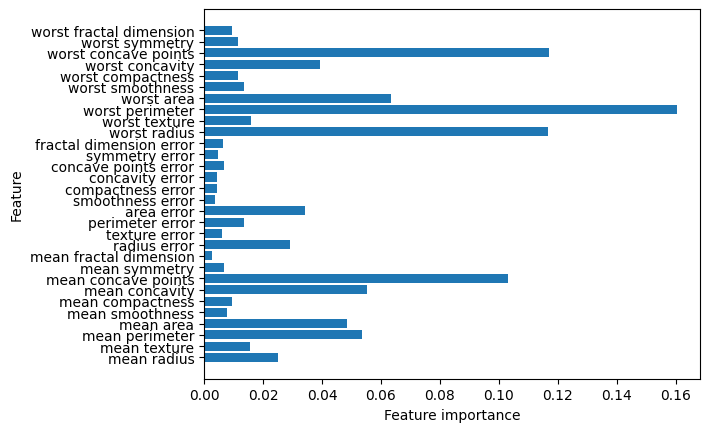

In [40]:
plot_feature_importances_cancer(forest)

Random forests don’t tend to perform well on very high dimensional, sparse data,
such as text data. For this kind of data, linear models might be more appropriate.
Random forests usually work well even on very large datasets, and training can easily
be parallelized over many CPU cores within a powerful computer. However, random
forests require more memory and are slower to train and to predict than linear models.
If time and memory are important in an application, it might make sense to use a
linear model instead.

As described earlier, max_features determines how random each tree is, and a
smaller max_features reduces overfitting. In general, it’s a good rule of thumb to use
the default values: max_features=sqrt(n_features) for classification and max_fea
tures=log2(n_features) for regression

### Gradient boosted regression trees

The gradient boosted regression tree is another ensemble method that combines multiple
decision trees to create a more powerful model.

In contrast to the
random forest approach, gradient boosting works by building trees in a serial manner,
where each tree tries to correct the mistakes of the previous one.

Gradient boosted trees often use very shallow trees, of depth one to five,
which makes the model smaller in terms of memory and makes predictions faster

Apart from the pre-pruning and the number of trees in the ensemble, another important
parameter of gradient boosting is the learning_rate, which controls how
strongly each tree tries to correct the mistakes of the previous trees

Accuracy on training set: 1.000
Accuracy on test set: 0.965


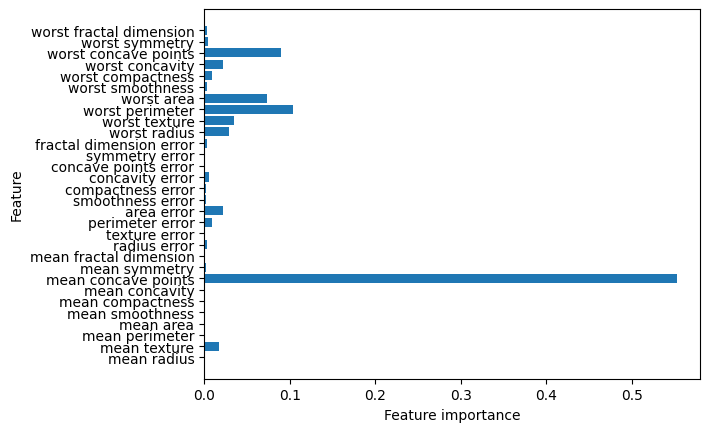

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.944
Accuracy on test set: 0.958


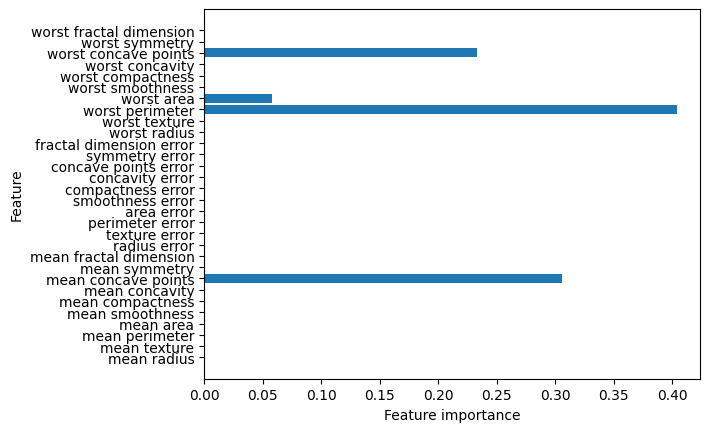

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(learning_rate=0.01, n_estimators=150,max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


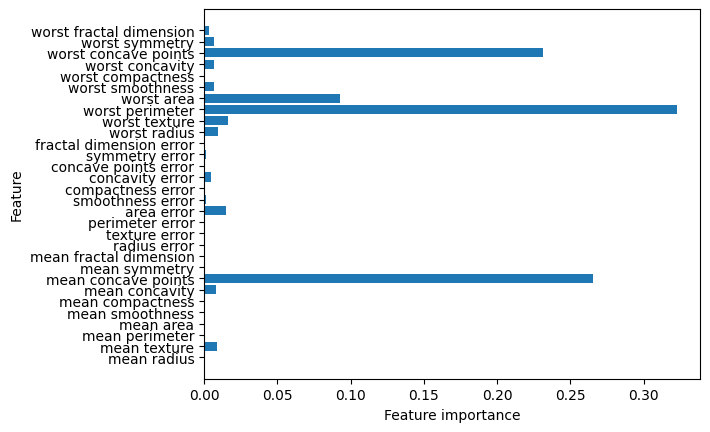

In [43]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


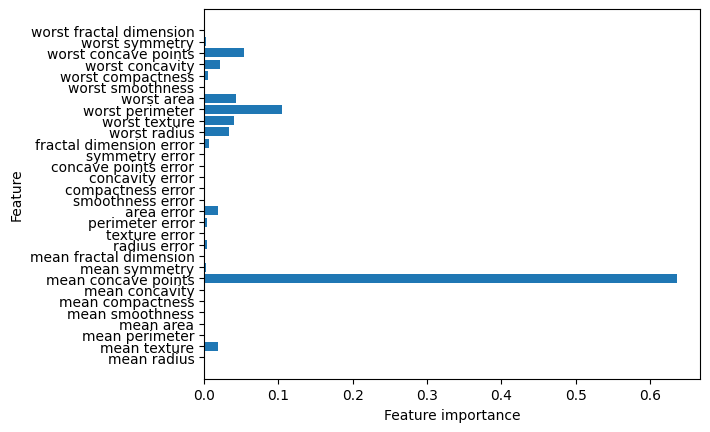

In [44]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.974
Accuracy on test set: 0.965


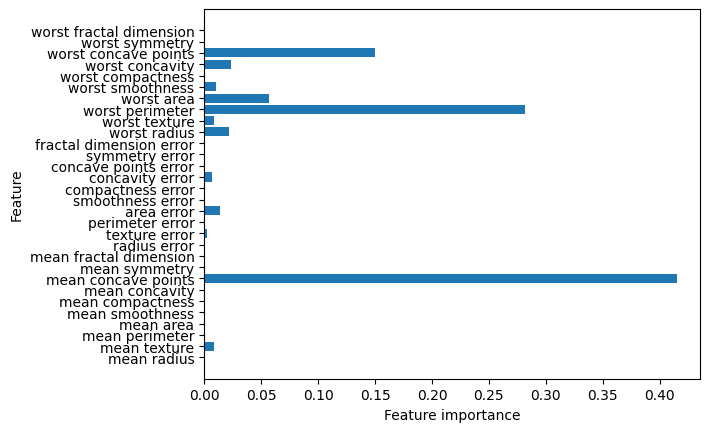

In [45]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth = 2)
gbrt.fit(X_train, y_train)


plot_feature_importances_cancer(gbrt)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

A common approach is to first try random forests, which work quite robustly. If random
forests work well but prediction time is at a premium, or it is important to
squeeze out the last percentage of accuracy from the machine learning model, moving
to gradient boosting often helps.

A lower learning_rate means that more trees are needed to build
a model of similar complexity. In contrast to random forests, where a higher n_esti
mators value is always better, increasing n_estimators in gradient boosting leads to a
more complex model, which may lead to overfitting

### Kernelized Support Vector Machines

Kernelized support vector machines
(often just referred to as SVMs) are an extension that allows for more complex mod
els
that are not defined simply by hyperplanes in the input space

In [46]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [47]:
coef, intercept = linear_svm.coef_.ravel(), linear_svm.intercept_

print("Coefficient is {}".format(coef))
print("Intercept is {}".format(intercept))

Coefficient is [ 3.03330577e-02  2.02935726e-02  7.38912061e-02  1.10356054e-03
 -5.63123819e-04 -3.46740317e-03 -4.65274079e-03 -1.98257138e-03
 -8.54123465e-04 -1.04668895e-04  1.07850692e-03  3.86367692e-03
 -4.70771119e-03 -1.20599200e-02 -1.79039370e-05 -7.29530649e-04
 -8.05366990e-04 -2.59075336e-04 -1.73898203e-04 -4.49916083e-05
  3.14398858e-02 -3.19476939e-02 -1.24514964e-02 -7.50460131e-03
 -1.13976591e-03 -1.25298658e-02 -1.46575857e-02 -4.35781354e-03
 -3.08641333e-03 -1.02940593e-03]
Intercept is [0.00542057]


In [48]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_train[:, 0].min() - 2, X_train[:, 0].max() + 2, 50)
yy = np.linspace(X_train[:, 1].min() - 2, X_train[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
mask = 0
ax.scatter(X_train[mask, 0], X_train[mask, 1], X_train[mask, 2], c='b', s=60)
ax.scatter(X_train[~mask, 0], X_train[~mask, 1], X_train[~mask, 2], c='r', marker='^', s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")


Text(0.5, 0, 'feature0 ** 2')

<Figure size 640x480 with 0 Axes>

The kernel trick is that adding nonlinear features to the representation of our data can
make linear models much more powerful

There are two ways to map your data into a higher-dimensional space that are commonly
used with support vector machines: the polynomial kernel, which computes all
possible polynomials up to a certain degree of the original features (like feature1 **
2 * feature2 ** 5); and the radial basis function (RBF) kernel, also known as the
Gaussian kernel.

Typically only a subset of
the training points matter for defining the decision boundary: the ones that lie on the
border between the classes. These are called support vectors and give the support vector
machine its name.

To make a prediction for a new point, the distance to each of the support vectors is
measured. A classification decision is made based on the distances to the support vector,
and the importance of the support vectors that was learned during training
(stored in the dual_coef_ attribute of SVC).

In [ ]:
from sklearn.svm import SVC
X, y = X_train, y_train
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
# plt.plot(svm, X, eps=.5)
plt.scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
plt.scatter(sv[:, 0], sv[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

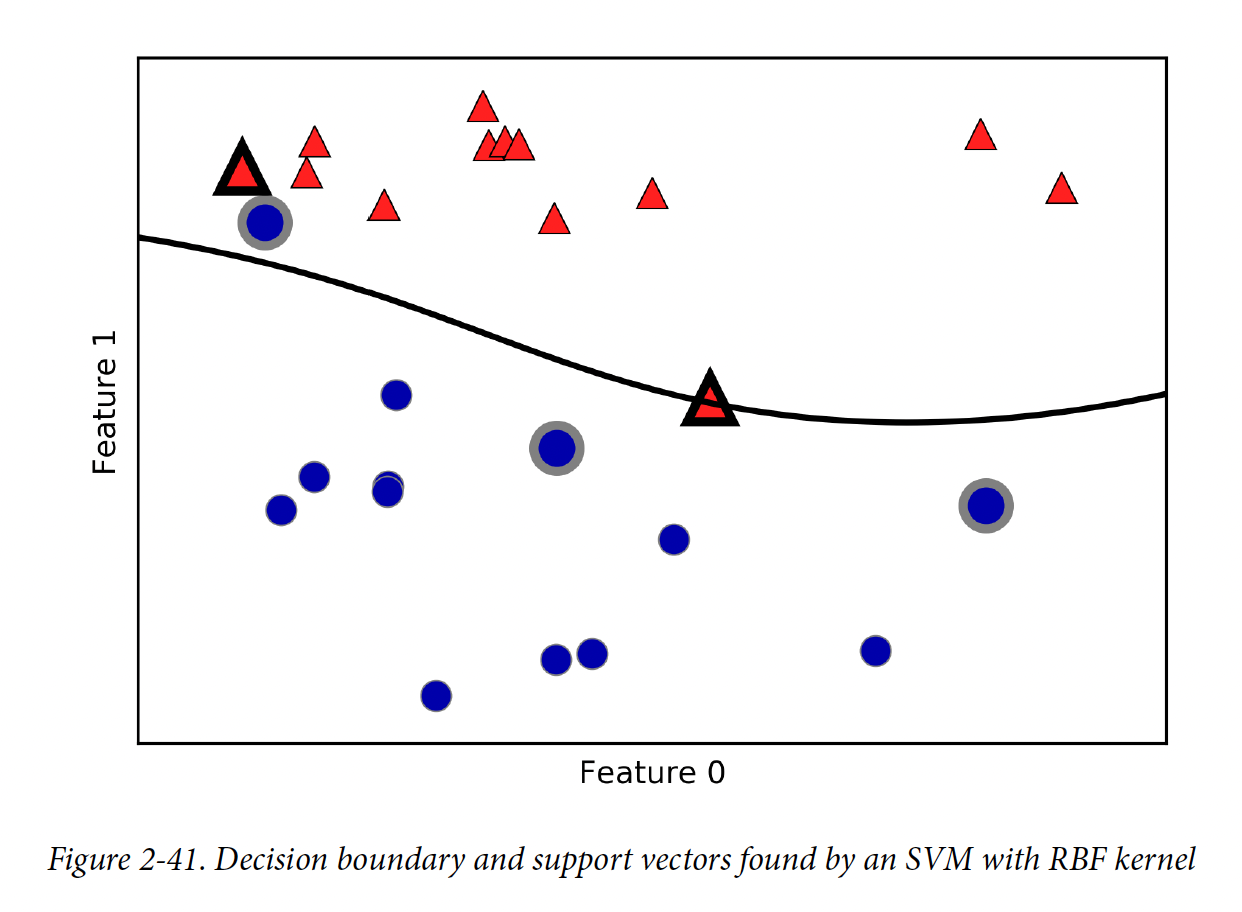

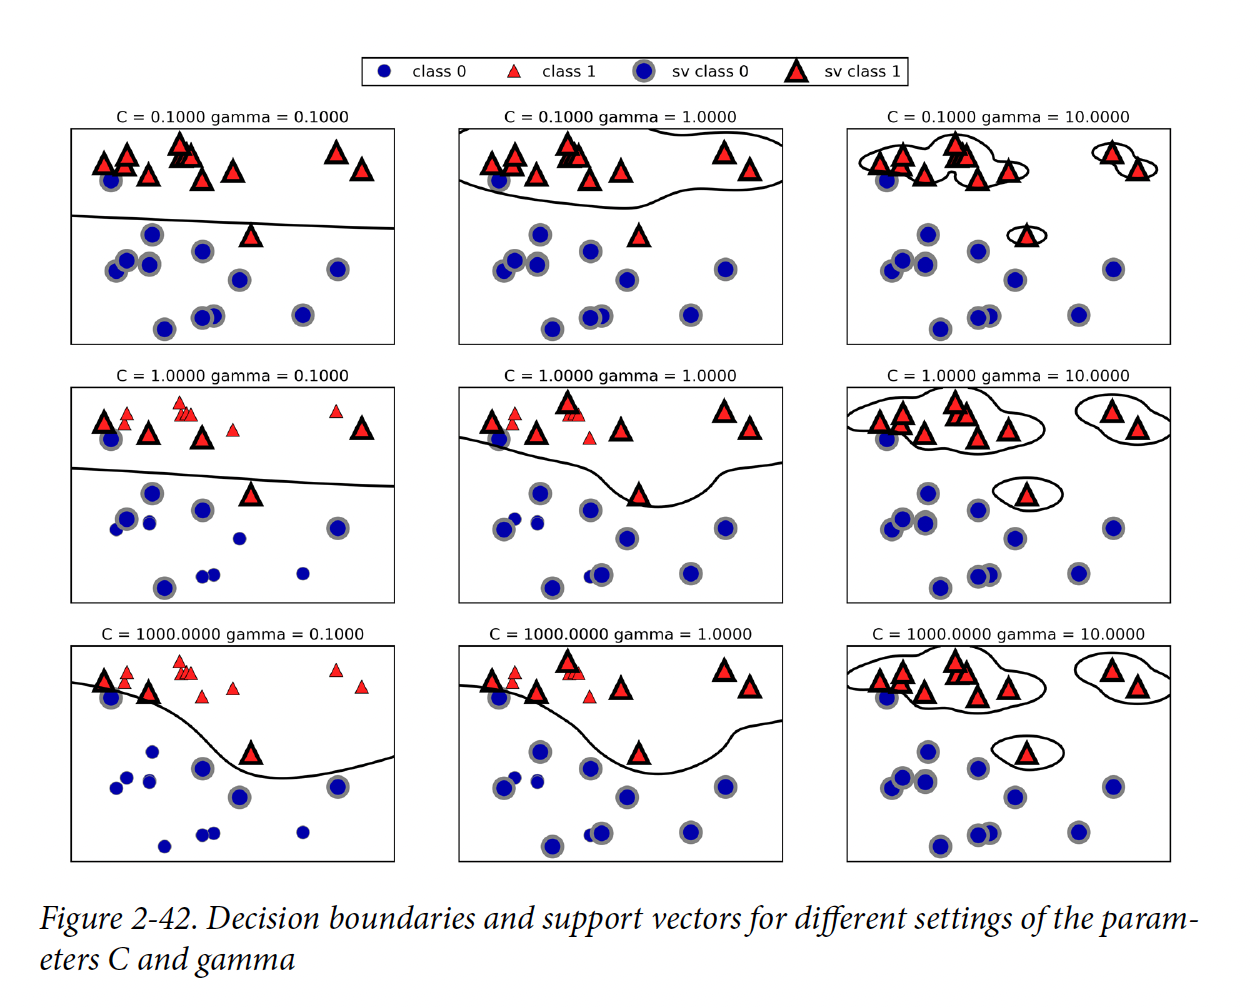

A
low value of
means that the decision boundary will vary slowly, which yields a
gamma
model of low complexity, while a high value of
yields a more complex model
gamma

A small
means a very restricted model, where each data point can
C
only have very limited influence. You can see that at the top left the decision boundary
looks nearly linear, with the misclassified points barely having any influence on
the line. Increasing C, as shown on the bottom right, allows these points to have a
stronger influence on the model and makes the decision boundary bend to correctly
classify them.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


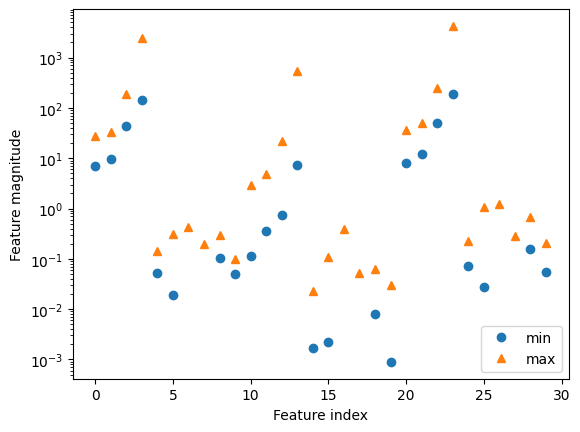

In [52]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [60]:
X_train.min(axis=0)

array([6.981e+00, 9.710e+00, 4.379e+01, 1.435e+02, 5.263e-02, 1.938e-02,
       0.000e+00, 0.000e+00, 1.060e-01, 4.996e-02, 1.115e-01, 3.628e-01,
       7.570e-01, 7.228e+00, 1.713e-03, 2.252e-03, 0.000e+00, 0.000e+00,
       7.882e-03, 8.948e-04, 7.930e+00, 1.202e+01, 5.041e+01, 1.852e+02,
       7.117e-02, 2.729e-02, 0.000e+00, 0.000e+00, 1.565e-01, 5.504e-02])

In [65]:
range_on_training = (X_train - X_train.min(axis=0)).max(axis=0)
range_on_training

array([2.11290e+01, 2.41000e+01, 1.44710e+02, 2.35750e+03, 9.20700e-02,
       2.92020e-01, 4.26800e-01, 2.01200e-01, 1.98000e-01, 4.74800e-02,
       2.76150e+00, 4.52220e+00, 2.12230e+01, 5.34972e+02, 2.16170e-02,
       1.04148e-01, 3.96000e-01, 5.27900e-02, 5.35780e-02, 2.89452e-02,
       2.81100e+01, 3.75200e+01, 2.00790e+02, 4.06880e+03, 1.51430e-01,
       1.03071e+00, 1.25200e+00, 2.90300e-01, 5.07300e-01, 1.52460e-01])

One way to resolve overfitting problem when it happens is by rescaling each feature so that they are all
approximately on the same scale

In [61]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [62]:
# use THE SAME transformation on the test set,
# using min and range of the training set (see Chapter 3 for details)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [63]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


Scaling the data made a huge difference


we can try increasing either C or gamma to fit a more complex
model.

In [73]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


They work well on low-dimensional and high-dimensional data (i.e.,
few and many features), but don’t scale very well with the number of samples.

Downside of SVMs is that they require careful preprocessing of the data and
tuning of the parameters

The important parameters in kernel SVMs are the regularization parameter C, the
choice of the kernel, and the kernel-specific parameters. Gamma and C both control the complexity of the model, with large values
in either resulting in a more complex model